# Linear Regression

In [2]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  #Display output inline  (available only for the Jupyter Notebook and the Jupyter QtConsole)

# Dataset

In [8]:
dataset = pd.read_csv('student_scores.csv') 

In [9]:
dataset.shape #our dataset has 25 rows and 2 columns

(25, 2)

In [10]:
dataset.head() #method retrieves the first 5 records from our dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [11]:
dataset.describe() #To see statistical details of the dataset

# count - The number of not-empty values.
# mean - The average (mean) value.
# std - The standard deviation.
# min - the minimum value.
# 25% - The 25% percentile*.
# 50% - The 50% percentile*.
# 75% - The 75% percentile*.
# max - the maximum value.

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [21]:
dataset.duplicated().sum()

0

# data points on 2-D graph

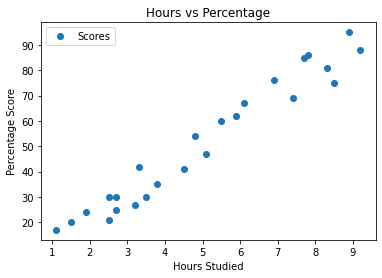

In [12]:
dataset.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

# Preparing the Data

In [16]:
X = dataset.iloc[:, :-1].values
#print(X)
y = dataset.iloc[:, 1].values
#print(y)

**split this data into training and test sets.**

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#The above script splits 80% of the data to training set while 20% of the data to test set. 
#The test_size variable is where we actually specify the proportion of test set.

# Training the Algorithm

In [18]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [26]:
y_pred = regressor.predict(X_test) #Making Predictions
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [30]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


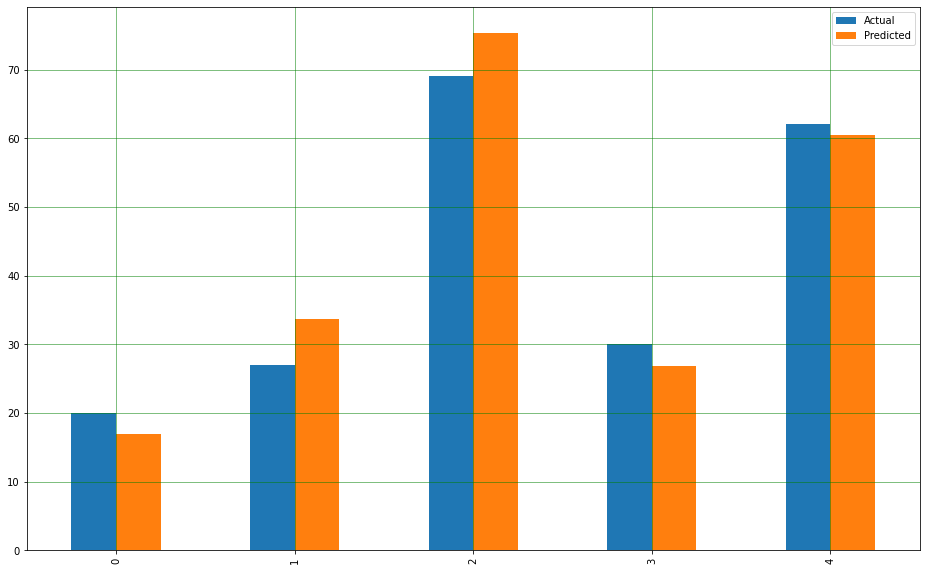

In [45]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

**Mean Absolute Error :** is the average of all absolute errors.

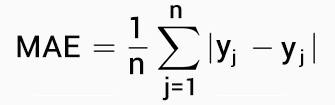


**Mean Squared Error :** the difference between your model predictions and the ground truth, square it, and average it out across the whole dataset.


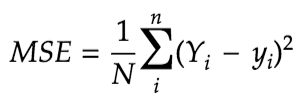

**Root Mean Squared Error:** is the square root of the mean of the square of all of the error. The use of RMSE is very common, and it is considered an excellent general purpose error metric for numerical predictions.

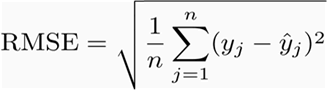

In [29]:
from sklearn import metrics
print('Mean Absolute Error is the average of all absolute errors. :', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error : ', metrics.mean_squared_error(y_test, y_pred)) #the difference between your model predictions and the ground truth, square it, and average it out across the whole dataset.
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) #is the square root of the mean of the square of all of the error. The use of RMSE is very common, and it is considered an excellent general purpose error metric for numerical predictions.

Mean Absolute Error is the average of all absolute errors. : 4.183859899002982
Mean Squared Error the difference between your model predictions and the ground truth, square it, and average it out across the whole dataset.:  21.598769307217456
Root Mean Squared Error: 4.647447612100373


In [34]:
regressor.score(X, y)


0.9526947647057273

In [47]:
from sklearn.metrics import mean_squared_error
print('The Error of our Detection Model is: ',mean_squared_error(y_test,y_pred))

The Error of our Detection Model is:  21.598769307217456


In the theory section we said that linear regression model basically finds the best value for the intercept and slope, which results in a line that best fits the data. To see the value of the intercept and slop calculated by the linear regression algorithm for our dataset


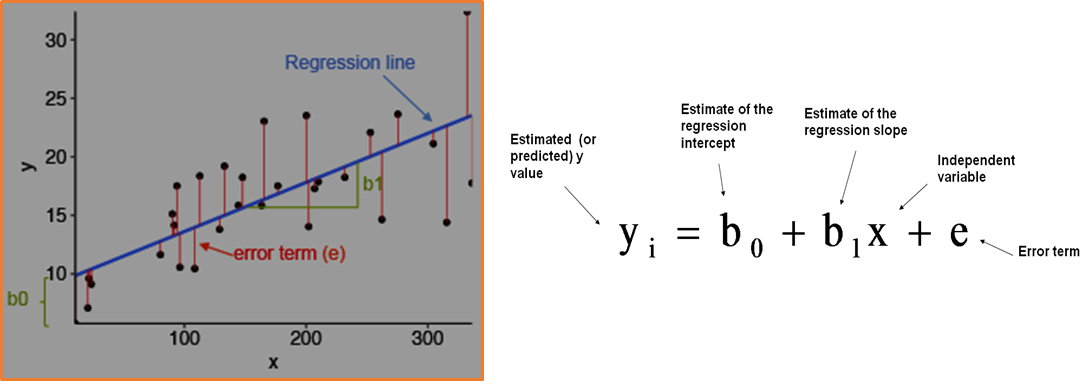

In [48]:
print(regressor.intercept_) #o retrieve the intercept

2.018160041434662


In [49]:
print(regressor.coef_) #For retrieving the slope (coefficient of x)

[9.91065648]


This means that for every one unit of change in hours studied, the change in the score is about 9.91%. Or in simpler words, if a student studies one hour more than they previously studied for an exam, they can expect to achieve an increase of 9.91% in the score achieved by the student previously.